In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gradients = np.array([10,40,70,100,130,160])
densities = np.arange(20,200,10)

# Creating a car distribution

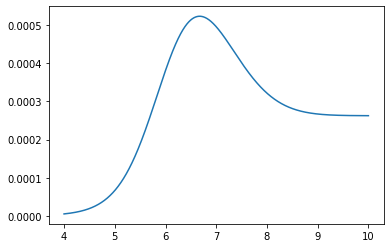

In [100]:
time = np.arange(4*3600,10*3600)
demand=0.0002625850896568391*(1/(1+np.exp(-(time-6*3600)/(0.5*3600))))*(1.9*np.exp(-((time-6*3600)/(1.4*3600))**2)+1);
plt.plot(time/3600,demand)

In [111]:
passengers = []
factor = 1
print(demand.max()*factor)
for i, t in enumerate(time):
    prob = demand[i]
    passengers.append(np.random.poisson(demand[i]*factor))
    

0.0005225483217795816


In [112]:
np.sum(passengers)

3

# Dependencia del flujo con el gradiente y los diferentes parámetros de movimiento

## pchange

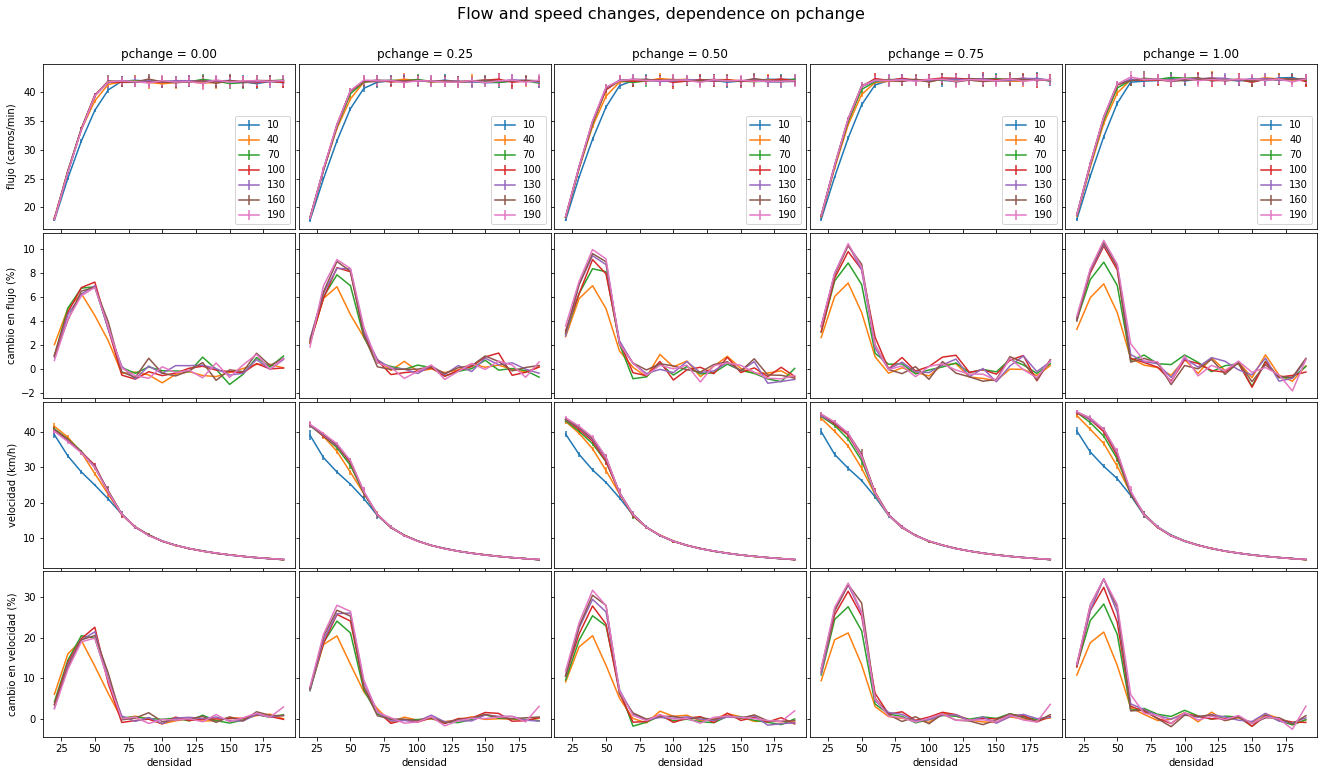

In [56]:
gradients = [10,40,70,100,130,160,190]
densities = np.arange(20,200,10)
pchanges = [0,0.25,0.5,0.75,1]
p = 0.25
p0 = 0.5
pchange_slow = 0.25
psurr = 0.25
psurr_slow = 0.25
data = np.zeros((len(gradients), len(densities), len(pchanges),4))

for i, gradient in enumerate(gradients):
    for j,density in enumerate(densities):
        for k,pchange in enumerate(pchanges):
            filename = 'data/sim_results_5_2_left_%dm_%d_%.2f_%.2f_%.2f_%.2f_%.2f_%.2f.txt'%(gradient,density, p, p0, pchange, pchange_slow, psurr, psurr_slow) 
            data[i,j,k] = np.loadtxt(filename)

wi=3.5
# individual height
hi=2.3
# left margin
lm=0.62
# right margin
rm=0.1
# bottom margin
bm=0.45
# top margin
tm=1
# horizontal gap
hg=0.05
# vertical gap
vg=0.05
# number of columns
nc=len(pchanges)
# number of rows
nr=4

# The calculations
sx=wi*nc+lm+rm+hg*(nc-1)  # Figure x
sy=hi*nr+bm+tm+vg*(nr-1)  # Figure y
t=(sy-tm)/sy
b=bm/sy
l=lm/sx
r=(sx-rm)/sx
hr=vg/hi
wr=hg/wi


####################################
f, ax = plt.subplots(nr,nc,figsize=(sx,sy), sharex=True, sharey='row')
f.suptitle('Flow and speed changes, dependence on pchange', fontsize=16)

for i,gradient in enumerate(gradients):
    for k in range(len(pchanges)):
        ax[0][k].errorbar(densities, data[i,:,k,0]*60, yerr = data[i,:,k,1]*60, label = gradient, color = 'C%d'%i)
        ax[2][k].errorbar(densities, data[i,:,k,2]*3.6, yerr = data[i,:,k,3]*3.6, label = gradient, color = 'C%d'%i)
        if (i>0):
            ax[1][k].plot(densities, 100*(data[i,:,k,0]-data[0,:,k,0])/data[0,:,k,0], label = gradient, color = 'C%d'%i)
            ax[3][k].plot(densities, 100*(data[i,:,k,2]-data[0,:,k,2])/data[0,:,k,2], label = gradient, color = 'C%d'%i)
        ax[3][k].set_xlabel('densidad')
        ax[0][k].set_title('pchange = %.2f'%pchanges[k])
ax[0][0].set_ylabel('flujo (carros/min)')
ax[1][0].set_ylabel('cambio en flujo (%)')
ax[2][0].set_ylabel('velocidad (km/h)')
ax[3][0].set_ylabel('cambio en velocidad (%)')


        
[ax[0][k].legend() for k in range(len(pchanges))]

plt.subplots_adjust(wspace=wr,hspace=hr,bottom=b, top=t, left=l, right=r)
f.align_ylabels()
plt.savefig('images/pchange_dependence.png', dpi=1000)

## pchange_slow

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


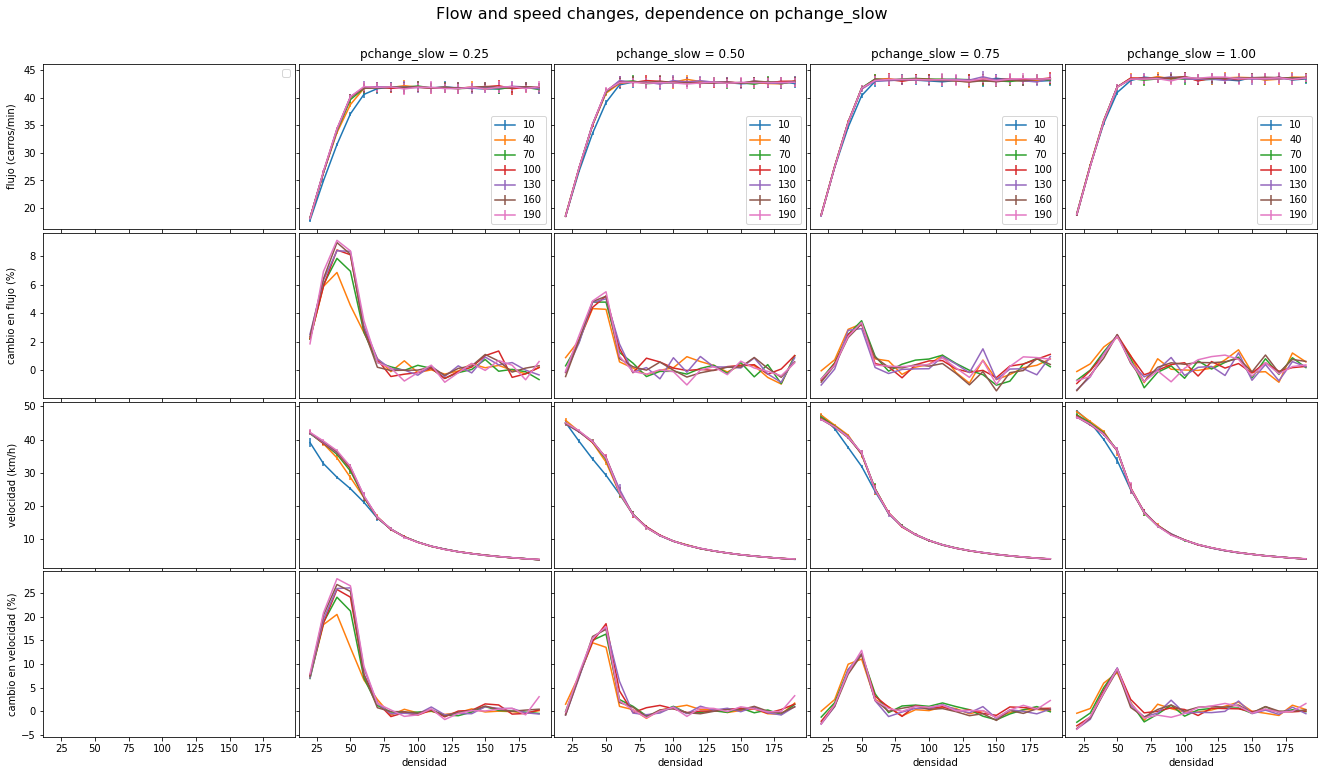

In [59]:
gradients = [10,40,70,100,130,160,190]
densities = np.arange(20,200,10)
pchange_slows = [0,0.25,0.5,0.75,1]
p = 0.25
p0 = 0.5
pchange = 0.25
psurr = 0.25
psurr_slow = 0.25
data = np.zeros((len(gradients), len(densities), len(pchanges),4))

for i, gradient in enumerate(gradients):
    for j,density in enumerate(densities):
        for k,pchange_slow in enumerate(pchange_slows):
            filename = 'data/sim_results_5_2_left_%dm_%d_%.2f_%.2f_%.2f_%.2f_%.2f_%.2f.txt'%(gradient,density, p, p0, pchange, pchange_slow, psurr, psurr_slow) 
            data[i,j,k] = np.loadtxt(filename)

wi=3.5
# individual height
hi=2.3
# left margin
lm=0.62
# right margin
rm=0.1
# bottom margin
bm=0.45
# top margin
tm=1
# horizontal gap
hg=0.05
# vertical gap
vg=0.05
# number of columns
nc=len(pchanges)
# number of rows
nr=4

# The calculations
sx=wi*nc+lm+rm+hg*(nc-1)  # Figure x
sy=hi*nr+bm+tm+vg*(nr-1)  # Figure y
t=(sy-tm)/sy
b=bm/sy
l=lm/sx
r=(sx-rm)/sx
hr=vg/hi
wr=hg/wi


####################################
f, ax = plt.subplots(nr,nc,figsize=(sx,sy), sharex=True, sharey='row')
f.suptitle('Flow and speed changes, dependence on pchange_slow', fontsize=16)

for i,gradient in enumerate(gradients):
    for k in range(1,len(pchanges)):
        ax[0][k].errorbar(densities, data[i,:,k,0]*60, yerr = data[i,:,k,1]*60, label = gradient, color = 'C%d'%i)
        ax[2][k].errorbar(densities, data[i,:,k,2]*3.6, yerr = data[i,:,k,3]*3.6, label = gradient, color = 'C%d'%i)
        if (i>0):
            ax[1][k].plot(densities, 100*(data[i,:,k,0]-data[0,:,k,0])/data[0,:,k,0], label = gradient, color = 'C%d'%i)
            ax[3][k].plot(densities, 100*(data[i,:,k,2]-data[0,:,k,2])/data[0,:,k,2], label = gradient, color = 'C%d'%i)
        ax[3][k].set_xlabel('densidad')
        ax[0][k].set_title('pchange_slow = %.2f'%pchanges[k])
ax[0][0].set_ylabel('flujo (carros/min)')
ax[1][0].set_ylabel('cambio en flujo (%)')
ax[2][0].set_ylabel('velocidad (km/h)')
ax[3][0].set_ylabel('cambio en velocidad (%)')


        
[ax[0][k].legend() for k in range(len(pchanges))]

plt.subplots_adjust(wspace=wr,hspace=hr,bottom=b, top=t, left=l, right=r)
f.align_ylabels()
plt.savefig('images/pchange_slow_dependence.png', dpi=1000)

## psurr

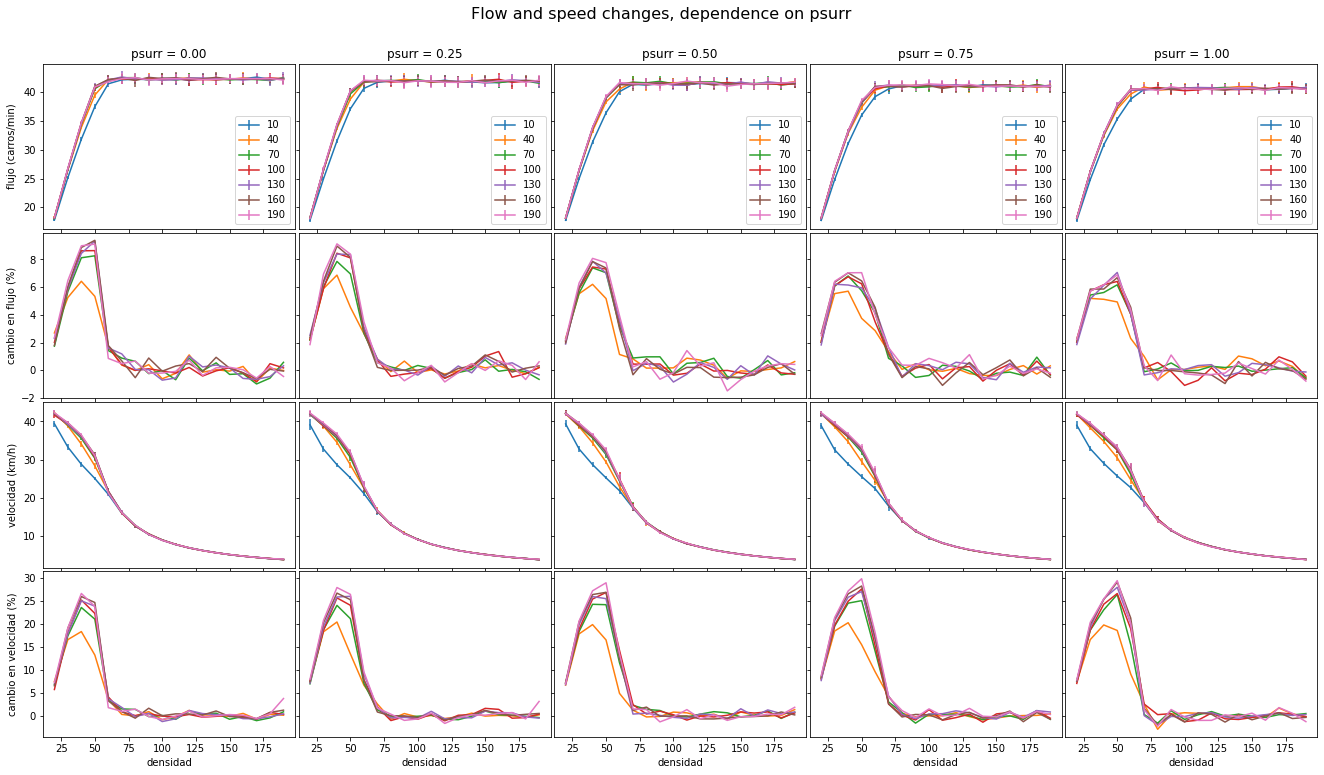

In [63]:
gradients = [10,40,70,100,130,160,190]
densities = np.arange(20,200,10)
psurrs = [0,0.25,0.5,0.75,1]
p = 0.25
p0 = 0.5
pchange = 0.25
pchange_slow = 0.25
psurr_slow = 0.25
data = np.zeros((len(gradients), len(densities), len(pchanges),4))

for i, gradient in enumerate(gradients):
    for j,density in enumerate(densities):
        for k,psurr in enumerate(psurrs):
            filename = 'data/sim_results_5_2_left_%dm_%d_%.2f_%.2f_%.2f_%.2f_%.2f_%.2f.txt'%(gradient,density, p, p0, pchange, pchange_slow, psurr, psurr_slow) 
            data[i,j,k] = np.loadtxt(filename)

wi=3.5
# individual height
hi=2.3
# left margin
lm=0.62
# right margin
rm=0.1
# bottom margin
bm=0.45
# top margin
tm=1
# horizontal gap
hg=0.05
# vertical gap
vg=0.05
# number of columns
nc=len(pchanges)
# number of rows
nr=4

# The calculations
sx=wi*nc+lm+rm+hg*(nc-1)  # Figure x
sy=hi*nr+bm+tm+vg*(nr-1)  # Figure y
t=(sy-tm)/sy
b=bm/sy
l=lm/sx
r=(sx-rm)/sx
hr=vg/hi
wr=hg/wi


####################################
f, ax = plt.subplots(nr,nc,figsize=(sx,sy), sharex=True, sharey='row')
f.suptitle('Flow and speed changes, dependence on psurr', fontsize=16)

for i,gradient in enumerate(gradients):
    for k in range(len(pchanges)):
        ax[0][k].errorbar(densities, data[i,:,k,0]*60, yerr = data[i,:,k,1]*60, label = gradient, color = 'C%d'%i)
        ax[2][k].errorbar(densities, data[i,:,k,2]*3.6, yerr = data[i,:,k,3]*3.6, label = gradient, color = 'C%d'%i)
        if (i>0):
            ax[1][k].plot(densities, 100*(data[i,:,k,0]-data[0,:,k,0])/data[0,:,k,0], label = gradient, color = 'C%d'%i)
            ax[3][k].plot(densities, 100*(data[i,:,k,2]-data[0,:,k,2])/data[0,:,k,2], label = gradient, color = 'C%d'%i)
        ax[3][k].set_xlabel('densidad')
        ax[0][k].set_title('psurr = %.2f'%pchanges[k])
ax[0][0].set_ylabel('flujo (carros/min)')
ax[1][0].set_ylabel('cambio en flujo (%)')
ax[2][0].set_ylabel('velocidad (km/h)')
ax[3][0].set_ylabel('cambio en velocidad (%)')


        
[ax[0][k].legend() for k in range(len(pchanges))]

plt.subplots_adjust(wspace=wr,hspace=hr,bottom=b, top=t, left=l, right=r)
f.align_ylabels()
#plt.savefig('images/psurr_dependence.png', dpi=1000)

## psurr_slow

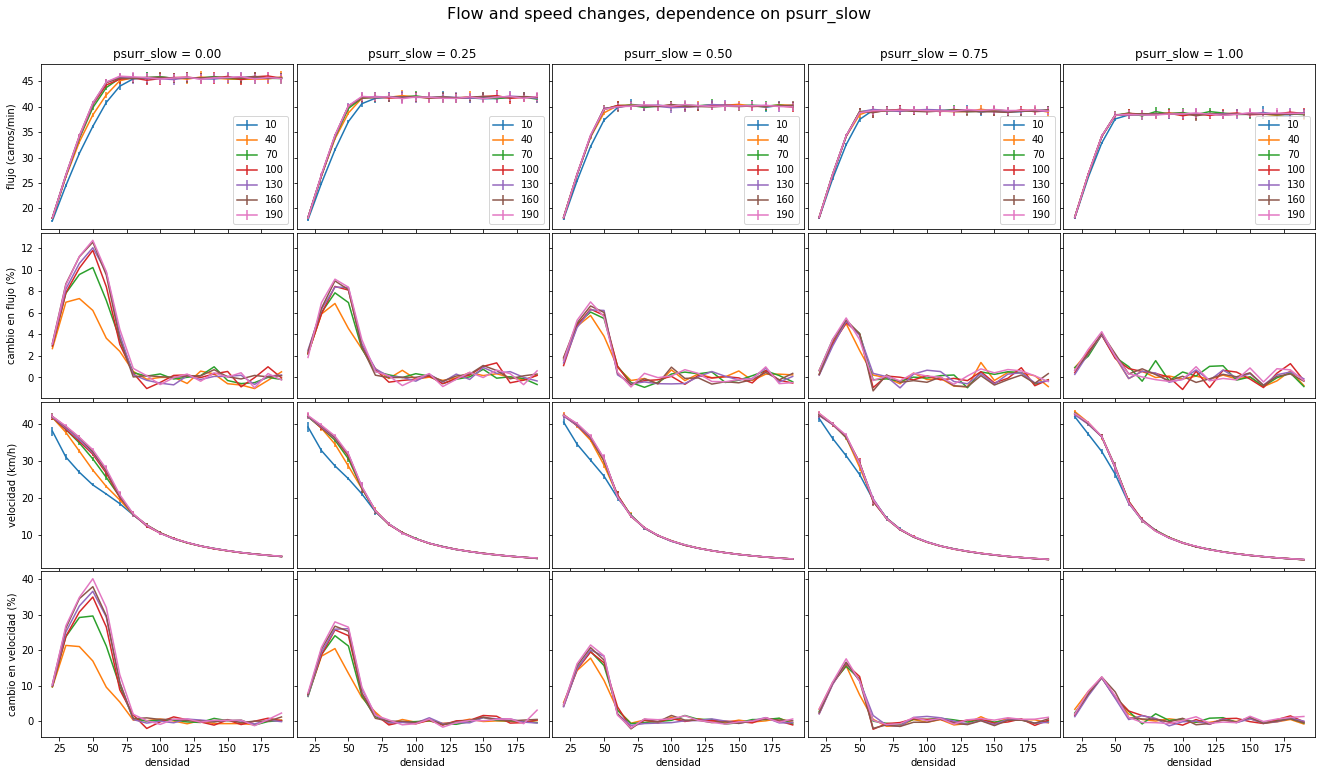

In [64]:
gradients = [10,40,70,100,130,160,190]
densities = np.arange(20,200,10)
psurr_slows = [0,0.25,0.5,0.75,1]
p = 0.25
p0 = 0.5
pchange = 0.25
pchange_slow = 0.25
psurr = 0.25
data = np.zeros((len(gradients), len(densities), len(psurr_slows),4))

for i, gradient in enumerate(gradients):
    for j,density in enumerate(densities):
        for k,psurr_slow in enumerate(psurr_slows):
            filename = 'data/sim_results_5_2_left_%dm_%d_%.2f_%.2f_%.2f_%.2f_%.2f_%.2f.txt'%(gradient,density, p, p0, pchange, pchange_slow, psurr, psurr_slow) 
            data[i,j,k] = np.loadtxt(filename)

wi=3.5
# individual height
hi=2.3
# left margin
lm=0.62
# right margin
rm=0.1
# bottom margin
bm=0.45
# top margin
tm=1
# horizontal gap
hg=0.05
# vertical gap
vg=0.05
# number of columns
nc=len(pchanges)
# number of rows
nr=4

# The calculations
sx=wi*nc+lm+rm+hg*(nc-1)  # Figure x
sy=hi*nr+bm+tm+vg*(nr-1)  # Figure y
t=(sy-tm)/sy
b=bm/sy
l=lm/sx
r=(sx-rm)/sx
hr=vg/hi
wr=hg/wi


####################################
f, ax = plt.subplots(nr,nc,figsize=(sx,sy), sharex=True, sharey='row')
f.suptitle('Flow and speed changes, dependence on psurr_slow', fontsize=16)

for i,gradient in enumerate(gradients):
    for k in range(len(pchanges)):
        ax[0][k].errorbar(densities, data[i,:,k,0]*60, yerr = data[i,:,k,1]*60, label = gradient, color = 'C%d'%i)
        ax[2][k].errorbar(densities, data[i,:,k,2]*3.6, yerr = data[i,:,k,3]*3.6, label = gradient, color = 'C%d'%i)
        if (i>0):
            ax[1][k].plot(densities, 100*(data[i,:,k,0]-data[0,:,k,0])/data[0,:,k,0], label = gradient, color = 'C%d'%i)
            ax[3][k].plot(densities, 100*(data[i,:,k,2]-data[0,:,k,2])/data[0,:,k,2], label = gradient, color = 'C%d'%i)
        ax[3][k].set_xlabel('densidad')
        ax[0][k].set_title('psurr_slow = %.2f'%pchanges[k])
ax[0][0].set_ylabel('flujo (carros/min)')
ax[1][0].set_ylabel('cambio en flujo (%)')
ax[2][0].set_ylabel('velocidad (km/h)')
ax[3][0].set_ylabel('cambio en velocidad (%)')


        
[ax[0][k].legend() for k in range(len(pchanges))]

plt.subplots_adjust(wspace=wr,hspace=hr,bottom=b, top=t, left=l, right=r)
f.align_ylabels()
#plt.savefig('images/psurr_dependence.png', dpi=1000)

## p0

In [65]:
gradients = [10,40,70,100,130,160,190]
densities = np.arange(20,200,10)
p0s = [0,0.25,0.5,0.75,1]
p = 0.25
psurr_slow = 0.5
pchange = 0.25
pchange_slow = 0.25
psurr = 0.25
data = np.zeros((len(gradients), len(densities), len(psurr_slows),4))

for i, gradient in enumerate(gradients):
    for j,density in enumerate(densities):
        for k,p0 in enumerate(p0s):
            filename = 'data/sim_results_5_2_left_%dm_%d_%.2f_%.2f_%.2f_%.2f_%.2f_%.2f.txt'%(gradient,density, p, p0, pchange, pchange_slow, psurr, psurr_slow) 
            data[i,j,k] = np.loadtxt(filename)

wi=3.5
# individual height
hi=2.3
# left margin
lm=0.62
# right margin
rm=0.1
# bottom margin
bm=0.45
# top margin
tm=1
# horizontal gap
hg=0.05
# vertical gap
vg=0.05
# number of columns
nc=len(pchanges)
# number of rows
nr=4

# The calculations
sx=wi*nc+lm+rm+hg*(nc-1)  # Figure x
sy=hi*nr+bm+tm+vg*(nr-1)  # Figure y
t=(sy-tm)/sy
b=bm/sy
l=lm/sx
r=(sx-rm)/sx
hr=vg/hi
wr=hg/wi


####################################
f, ax = plt.subplots(nr,nc,figsize=(sx,sy), sharex=True, sharey='row')
f.suptitle('Flow and speed changes, dependence on p0', fontsize=16)

for i,gradient in enumerate(gradients):
    for k in range(len(pchanges)):
        ax[0][k].errorbar(densities, data[i,:,k,0]*60, yerr = data[i,:,k,1]*60, label = gradient, color = 'C%d'%i)
        ax[2][k].errorbar(densities, data[i,:,k,2]*3.6, yerr = data[i,:,k,3]*3.6, label = gradient, color = 'C%d'%i)
        if (i>0):
            ax[1][k].plot(densities, 100*(data[i,:,k,0]-data[0,:,k,0])/data[0,:,k,0], label = gradient, color = 'C%d'%i)
            ax[3][k].plot(densities, 100*(data[i,:,k,2]-data[0,:,k,2])/data[0,:,k,2], label = gradient, color = 'C%d'%i)
        ax[3][k].set_xlabel('densidad')
        ax[0][k].set_title('p0 = %.2f'%pchanges[k])
ax[0][0].set_ylabel('flujo (carros/min)')
ax[1][0].set_ylabel('cambio en flujo (%)')
ax[2][0].set_ylabel('velocidad (km/h)')
ax[3][0].set_ylabel('cambio en velocidad (%)')


        
[ax[0][k].legend() for k in range(len(pchanges))]

plt.subplots_adjust(wspace=wr,hspace=hr,bottom=b, top=t, left=l, right=r)
f.align_ylabels()
#plt.savefig('images/psurr_dependence.png', dpi=1000)

FileNotFoundError: data/sim_results_5_2_left_10m_20_0.25_0.00_0.25_0.25_0.25_0.50.txt not found.

# Resultados con pchange=0.1, y psurr = 0.0

In [114]:
pchange = 0.1
psurr = 0

In [115]:
data = np.zeros((len(gradients), 3, len(densities)))
dataSD = np.zeros((len(gradients), 3, len(densities)))

In [116]:
conf = 'sim_results_6_3_left_'
for i,gradient in enumerate(gradients):
    for j,density in enumerate(densities):
        filename = '../cpp/sim_results/'+conf+'%dm_0.20_0.50_%.2f_%.2f_%d.txt'%(gradient,pchange,psurr,density)
        means = np.loadtxt(filename).mean(axis = 0)
        stds = np.loadtxt(filename).std(axis = 0)
        for k in range(3):
                data[i,k,j] = means[k]
                dataSD[i,k,j] = stds[k]

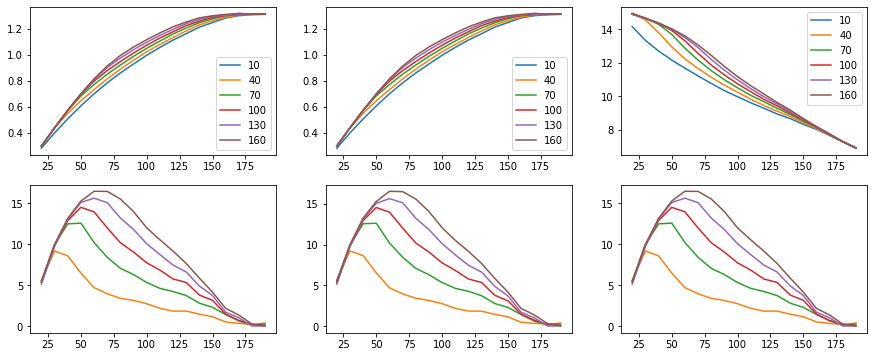

In [117]:
fig, ax = plt.subplots(2,3, figsize = (15,6))

for i,gradient in enumerate(gradients):
    for k in range(3):
        ax[0][k].plot(densities, data[i,k,:], '-', label = gradient)
        
[ax[0][k].legend() for k in range(3)]

for i,gradient in enumerate(gradients[1:]):
    for k in range(3):
        ax[1][k].plot(densities, 100*(data[i+1,k,:]-data[0,k,:])/data[0,k,:], '-', color='C%d'%(i+1), label = gradient)

# Resultados con pchange=0.4, y psurr = 0.0

In [109]:
pchange = 0.4
psurr = 0

In [110]:
data = np.zeros((len(gradients), 3, len(densities)))
dataSD = np.zeros((len(gradients), 3, len(densities)))

In [111]:
conf = 'sim_results_6_3_left_'
for i,gradient in enumerate(gradients):
    for j,density in enumerate(densities):
        filename = '../cpp/sim_results/'+conf+'%dm_0.20_0.50_%.2f_%.2f_%d.txt'%(gradient,pchange,psurr,density)
        means = np.loadtxt(filename).mean(axis = 0)
        stds = np.loadtxt(filename).std(axis = 0)
        for k in range(3):
                data[i,k,j] = means[k]
                dataSD[i,k,j] = stds[k]

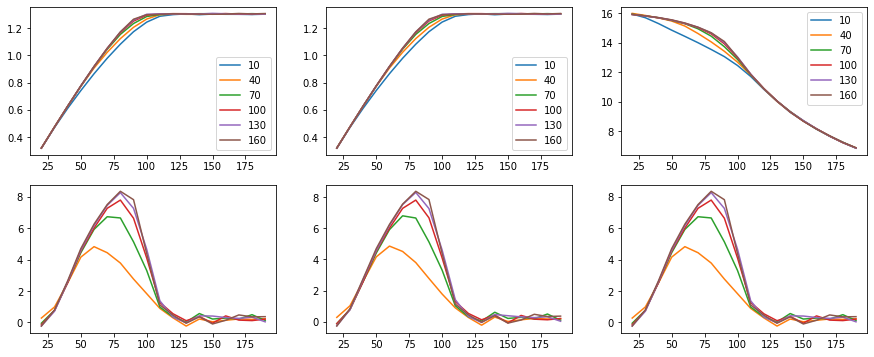

In [112]:
fig, ax = plt.subplots(2,3, figsize = (15,6))

for i,gradient in enumerate(gradients):
    for k in range(3):
        ax[0][k].plot(densities, data[i,k,:], '-', label = gradient)
        
[ax[0][k].legend() for k in range(3)]

for i,gradient in enumerate(gradients[1:]):
    for k in range(3):
        ax[1][k].plot(densities, 100*(data[i+1,k,:]-data[0,k,:])/data[0,k,:], '-', color='C%d'%(i+1), label = gradient)

# Resultados con Pchange = 0.7, Psurr = 0

In [93]:
pchange = 0.7
psurr = 0

In [94]:
data = np.zeros((len(gradients), 3, len(densities)))
dataSD = np.zeros((len(gradients), 3, len(densities)))

In [95]:
conf = 'sim_results_6_3_left_'
for i,gradient in enumerate(gradients):
    for j,density in enumerate(densities):
        filename = '../cpp/sim_results/'+conf+'%dm_0.20_0.50_%.2f_%.2f_%d.txt'%(gradient,pchange,psurr,density)
        means = np.loadtxt(filename).mean(axis = 0)
        stds = np.loadtxt(filename).std(axis = 0)
        for k in range(3):
                data[i,k,j] = means[k]
                dataSD[i,k,j] = stds[k]

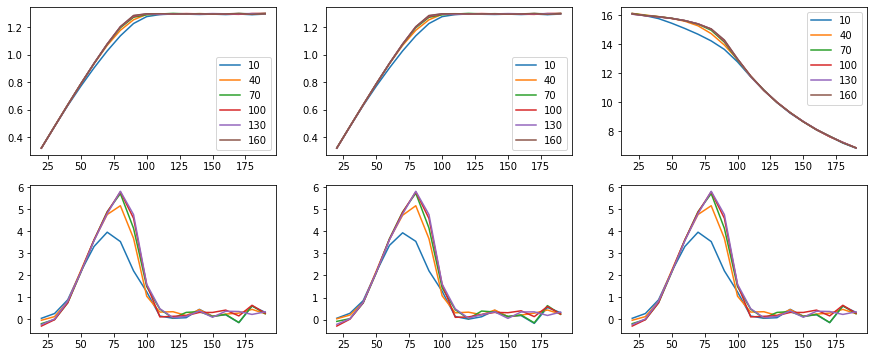

In [96]:
fig, ax = plt.subplots(2,3, figsize = (15,6))

for i,gradient in enumerate(gradients):
    for k in range(3):
        ax[0][k].plot(densities, data[i,k,:], '-', label = gradient)
        
[ax[0][k].legend() for k in range(3)]

for i,gradient in enumerate(gradients[1:]):
    for k in range(3):
        ax[1][k].plot(densities, 100*(data[i+1,k,:]-data[0,k,:])/data[0,k,:], '-', label = gradient)

# Resultados con Pchange = 1, Psurr = 0

In [97]:
pchange = 1
psurr = 0

In [98]:
data = np.zeros((len(gradients), 3, len(densities)))
dataSD = np.zeros((len(gradients), 3, len(densities)))

In [99]:
conf = 'sim_results_6_3_left_'
for i,gradient in enumerate(gradients):
    for j,density in enumerate(densities):
        filename = '../cpp/sim_results/'+conf+'%dm_0.20_0.50_%.2f_%.2f_%d.txt'%(gradient,pchange,psurr,density)
        means = np.loadtxt(filename).mean(axis = 0)
        stds = np.loadtxt(filename).std(axis = 0)
        for k in range(3):
                data[i,k,j] = means[k]
                dataSD[i,k,j] = stds[k]

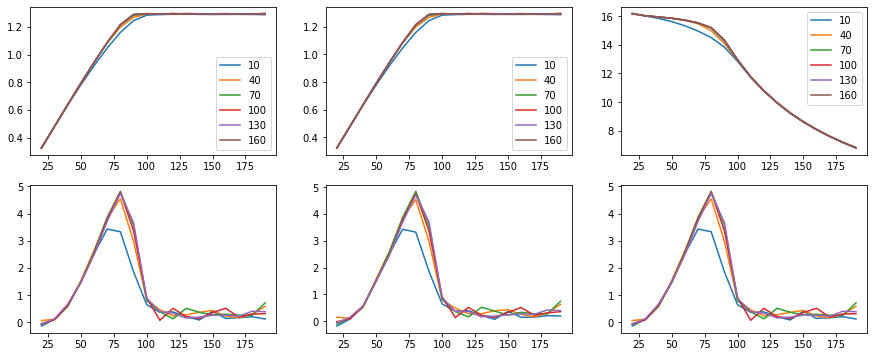

In [100]:
fig, ax = plt.subplots(2,3, figsize = (15,6))

for i,gradient in enumerate(gradients):
    for k in range(3):
        ax[0][k].plot(densities, data[i,k,:], '-', label = gradient)
        
[ax[0][k].legend() for k in range(3)]

for i,gradient in enumerate(gradients[1:]):
    for k in range(3):
        ax[1][k].plot(densities, 100*(data[i+1,k,:]-data[0,k,:])/data[0,k,:], '-', label = gradient)